In [2]:
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np

In [9]:
from sklearn.datasets import make_blobs

X,y = make_blobs(centers=2, random_state=0)

print('features : ',X.shape)
print('labels : ',y.shape)

print('first 5 samples : ',X[:5,:])
print('first 5 labels :',y[:5])

features :  (100, 2)
labels :  (100,)
first 5 samples :  [[ 4.21850347  2.23419161]
 [ 0.90779887  0.45984362]
 [-0.27652528  5.08127768]
 [ 0.08848433  2.32299086]
 [ 3.24329731  1.21460627]]
first 5 labels : [1 1 0 0 1]


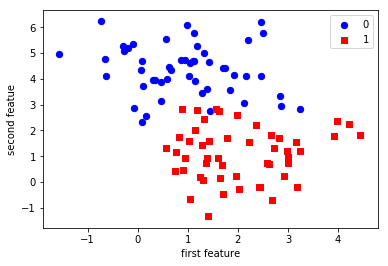

In [10]:
plt.scatter(X[y==0,0], X[y==0,1], color = 'blue', s=40, label='0')

plt.scatter(X[y==1,0], X[y==1,1], color = 'red', s=40, label='1', marker='s')

plt.xlabel("first feature")
plt.ylabel("second featue")
plt.legend(loc="upper right")

In [12]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25,
                                                   random_state=1234,
                                                   stratify=y)

In [13]:
#Logistic Regression Classifier
from sklearn.linear_model import LogisticRegression

clf = LogisticRegression()

clf.fit(X_train,y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=None, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False)

In [14]:
y_pred = clf.predict(X_test)

In [15]:
print(y_test)
print(y_pred)

[1 1 1 0 1 1 0 1 1 0 1 0 0 0 0 1 0 0 1 0 0 1 1 1 0]
[1 0 1 0 1 1 1 1 1 1 1 0 0 0 0 1 0 0 1 0 0 0 1 1 0]


In [16]:
clf.score(X_test,y_test)

0.84

In [17]:
clf.score(X_train,y_train)

0.9466666666666667

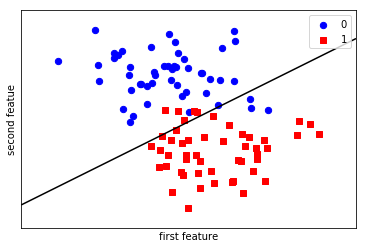

In [18]:
from figures import plot_2d_separator

plt.scatter(X[y==0,0], X[y==0,1], color = 'blue', s=40, label='0')

plt.scatter(X[y==1,0], X[y==1,1], color = 'red', s=40, label='1', marker='s')

plot_2d_separator(clf,X)

plt.xlabel("first feature")
plt.ylabel("second featue")
plt.legend(loc="upper right")

In [20]:

print(clf.coef_)
print(clf.intercept_)
# '_' is added after coef and intercept because they are classifier dependent

[[ 1.38092515 -1.49993172]]
[1.54995538]


In [21]:
# KNearest Neighbors

from sklearn.neighbors import KNeighborsClassifier


In [22]:
knn = KNeighborsClassifier(n_neighbors=3)

In [23]:
knn.fit(X_train,y_train)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=1, n_neighbors=3, p=2,
           weights='uniform')

In [24]:
y_pred = knn.predict(X_test)

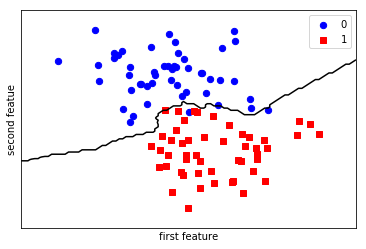

In [25]:
from figures import plot_2d_separator

plt.scatter(X[y==0,0], X[y==0,1], color = 'blue', s=40, label='0')

plt.scatter(X[y==1,0], X[y==1,1], color = 'red', s=40, label='1', marker='s')

plot_2d_separator(knn,X)

plt.xlabel("first feature")
plt.ylabel("second featue")
plt.legend(loc="upper right")

In [26]:
knn.score(X_test,y_test)

0.92

In [28]:
# Classifying iris data using knn classifier

knn_iris = KNeighborsClassifier(n_neighbors=3)

In [29]:
from sklearn.datasets import load_iris
iris = load_iris()

In [30]:
iris.keys()

dict_keys(['target', 'data', 'feature_names', 'target_names', 'DESCR'])

In [31]:
print(iris.data.shape)
print(iris.target.shape)

(150, 4)
(150,)


In [32]:
from sklearn.model_selection import train_test_split

X,y = iris.data, iris.target
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.25,random_state=1234,
                                                   stratify=y)

In [33]:
knn_iris.fit(X_train,y_train)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=1, n_neighbors=3, p=2,
           weights='uniform')

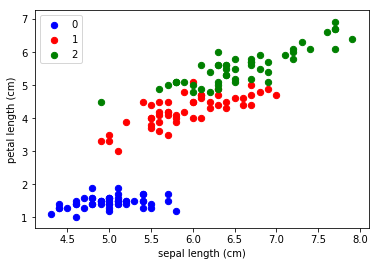

In [52]:

#from figures import plot_2d_separator

colors = ['blue','red','green']

for label,color in zip(range(len(iris.target)),colors):
    plt.scatter(X[y==label,0], X[y==label,2], color = color, s=40, label=label)

#plot_2d_separator(knn_iris, X)
plt.xlabel(iris.feature_names[0])
plt.ylabel(iris.feature_names[2])
plt.legend(loc='upper left')


In [49]:
y_pred = knn_iris.predict(X_test)

In [51]:
knn_iris.score(X_test,y_test)

0.9736842105263158